### 1. lib 

In [3]:
import pandas as pd

In [7]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 58B5-AB2A

 C:\Users\수민\Documents\GitHub\Tacademy 디렉터리

2019-01-24  오후 01:18    <DIR>          .
2019-01-24  오후 01:18    <DIR>          ..
2019-01-24  오후 01:08    <DIR>          .ipynb_checkpoints
2019-01-23  오후 06:19             2,050 airline_passengers.csv
2019-01-23  오후 06:19           252,590 apple_stock.csv
2019-01-23  오후 06:19             2,377 monthly-milk-production.csv
2019-01-23  오후 08:16             2,881 requirements.txt
2019-01-23  오후 06:19               532 sales-of-shampoo.csv
2019-01-24  오전 11:04             1,618 test example.ipynb
2019-01-24  오후 01:16             3,072 Untitled.ipynb
               7개 파일             265,120 바이트
               3개 디렉터리  15,279,624,192 바이트 남음


In [5]:
ex=pd.read_csv('airline_passengers.csv', header=3,encoding='euc-kr')
ex.head()

,1949-03,132
0,1949-04,129
1,1949-05,121
2,1949-06,135
3,1949-07,148
4,1949-08,148


### 2. 시계열

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing할 때 사용

In [10]:
from datetime import datetime

In [11]:
today =datetime(2019,1,24)

In [12]:
today

datetime.datetime(2019, 1, 24, 0, 0)

In [13]:
datetime(2019, 1, 24, 13, 39)

datetime.datetime(2019, 1, 24, 13, 39)

In [14]:
today.day

24

In [15]:
today.year

2019

In [16]:
today.month

1

In [17]:
dates =[datetime(2019, 1, 23), datetime(2019, 1, 24)]

In [19]:
dt_index = pd.DatetimeIndex(dates)
dt_index #datetime값을 타입 변환

DatetimeIndex(['2019-01-23', '2019-01-24'], dtype='datetime64[ns]', freq=None)

In [20]:
data = np.random.randn(2,2)

In [22]:
cols=['A','B']

In [28]:
df = pd.DataFrame(data=data, index=dt_index, columns=cols)
df # datetime이 index로 들어감

,A,B
2019-01-23,1.962943,-0.147880
2019-01-24,-1.417022,-0.301312


In [29]:
df.index.argmax()

1

In [30]:
df.index.max()

Timestamp('2019-01-24 00:00:00')

### 3. resampling

In [31]:
df = pd.read_csv('apple_stock.csv')

In [33]:
df.head() #index가 datetime이 아닌걸 확인하기. 일부러 그랬음 ! 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [35]:
df.info() #date가 object로 되어있음. int, str ..가 아니면 object임
#이걸 datetime으로 바꾸고 인덱스로 지정할거야

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null object
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


In [38]:
df['Date']=df['Date'].apply(pd.to_datetime) #지금 object인데 apply적용하면  datetime으로 바뀜

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null datetime64[ns]
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [42]:
df.set_index('Date') #date를 인덱스로 ! but 아직 date가 칼럼으로 들어가있음

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null datetime64[ns]
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [46]:
df.set_index('Date', inplace=True) #인덱스로 설정

KeyError: 'Date'

In [47]:
df.info() # 인덱스로 바뀐걸 확인 가능

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6)
memory usage: 123.9 KB


In [48]:
df['month'] = df.index.month

In [51]:
df.groupby('month').agg(sum) #월별로 합계를 알 수 있음. 하지만 연도가 바꼈는데 모든 월이 다 들어감. 각 연도별 각 월별 합계가 필요한거임 ㅠㅠ

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [52]:
df.groupby(df.index.year).sum() #연도별 합계가 나옴

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [53]:
df.groupby([df.index.year, df.index.month]).agg(sum) #각 연도별, 각 월별 합계 출력 가능, 인덱스 year와month두개를 써서 멀티 인덱스, 번거러움, 그래서 판다스에서 편리하게 사용할 수 있는걸 제공함

High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
     5      730.337135   699.494276   719.941429   718.461422  4.520664e+09   
     6      832.535709   812.074276   824.641434   820.742855  4.162813e+09   
     7      775.377140   753.262863   766.438568   764.849998  3.917426e+09   
     8      797.491417   783.245712   790.775719   789.872864  2.397280e+09   
     9      827.359993   811.739990   818.522850   821.552849  2.962480e+09   
     10     909.855713   893.007137   901.279999   902.802849  3.058644e+09   
     11     941.915722   926.407131   934.340004   934.764286  2.377022e+09   
     12    1015.334286  1005.722858  1011.407139  1010.384293  1.743309e+09   
2011 1      973.799992   955.328583   964.618561   966.800003  2.710384e+09   
     2      958.600002   944.887138   950.895706   953.210007  2.323987e+09   
     3     1151.114277  1131.195709  1143.562855  1141.755714  2.826615e+09   
     4      981.997139   965.321423   975.171432   972.615704  2.313457e+09   
     5     1032.851433  1018.240005  1025.958569  1025.354282  1.728015e+09   
     6     1051.567142  1031.604290  1043.190010  1040.541424  2.315963e+09   
     7     1071.921425  1050.395718  1058.758564  1063.537140  2.663487e+09   
     8     1254.649998  1219.489994  1239.569992  1237.934288  4.035650e+09   
     9     1191.664288  1164.200008  1177.138565  1177.480000  2.994362e+09   
     10    1205.449989  1174.577141  1190.231430  1191.690002  3.285357e+09   
     11    1166.638569  1145.058582  1158.804287  1154.445717  2.240925e+09   
     12    1186.994286  1170.418564  1178.311428  1178.791431  1.576633e+09   
2012 1     1231.452858  1216.601433  1225.028564  1224.508568  1.714964e+09   
     2     1430.997147  1404.107147  1413.722862  1421.631432  2.842139e+09   
     3     1829.345703  1792.201431  1812.982857  1815.024284  3.896084e+09   
     4     1758.535728  1710.428566  1741.735703  1731.437141  3.899748e+09   
     5     1798.158585  1754.962852  1778.181435  1774.687134  2.776586e+09   
...                ...          ...          ...          ...           ...   
2016 7     1983.279999  1960.049995  1969.019989  1971.129997  6.857796e+08   
     8     2487.230011  2460.689995  2471.650002  2476.300018  6.301285e+08   
     9     2346.650017  2305.960007  2324.140015  2327.999992  9.680156e+08   
     10    2444.150002  2413.769981  2430.619980  2429.850006  6.869143e+08   
     11    2332.439995  2288.760017  2311.729988  2313.239990  7.213055e+08   
     12    2415.529991  2384.449997  2393.909988  2401.050003  6.087717e+08   
2017 1     2397.619995  2375.710007  2381.869987  2391.399994  5.631220e+08   
     2     2549.070007  2523.899986  2531.460014  2540.569977  5.749686e+08   
     3     3247.550003  3213.309982  3228.330002  3234.210007  5.616284e+08   
     4     2728.360001  2704.219986  2717.570023  2714.849991  3.733041e+08   
     5     3367.349991  3324.390015  3343.249985  3349.009979  6.539818e+08   
     6     3279.949997  3224.819992  3260.730026  3252.289963  6.841781e+08   
     7     2983.529999  2942.110031  2961.930008  2965.989990  4.220119e+08   
     8     3683.490021  3629.480026  3655.780029  3657.490036  6.610690e+08   
     9     3177.390030  3128.930008  3162.180008  3152.169998  6.803741e+08   
     10    3488.910004  3446.750031  3461.829956  3471.979996  5.042913e+08   
     11    3641.990005  3590.809998  3622.299988  3620.530014  6.006634e+08   
     12    3457.709991  3416.970016  3434.439987  3437.830002  5.308

In [54]:
#timeseries offset strings를 알아야함, 

In [55]:
df.resample(rule='A').mean()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12.000000
2010-12-31,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119,6.583333
2011-12-31,52.489082,51.471100,52.008775,52.000618,1.230747e+08,34.822880,6.547619
2012-12-31,83.117914,81.417309,82.378960,82.292817,1.319642e+08,56.076387,6.500000
2013-12-31,68.234132,66.892443,67.589734,67.519269,1.016087e+08,53.083607,6.543651
2014-12-31,93.012664,91.475538,92.219830,92.264654,6.315273e+07,84.295298,6.551587
2015-12-31,121.244524,118.863095,120.175754,120.040000,5.183789e+07,112.931425,6.567460
2016-12-31,105.427183,103.690278,104.507778,104.604008,3.841516e+07,100.449894,6.555556
2017-12-31,151.406056,149.487650,150.444900,150.551075,2.713317e+07,147.299024,6.533865


In [56]:
df.resample(rule='A').mean()['2009'] #alias 확인하여 쓰면 됨

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719,12.0


In [57]:
def first_day(sample):
    return sample[0]

In [58]:
df.resample(rule='A').apply(first_day) #매년 첫쨋날 값

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


In [59]:
#리샘플링하면 차트 만들 때도 편리함. 

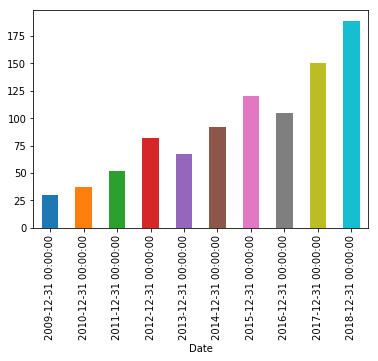

In [60]:
df['Close'].resample('A').mean().plot(kind='bar') #종가의 연평균을 바차트

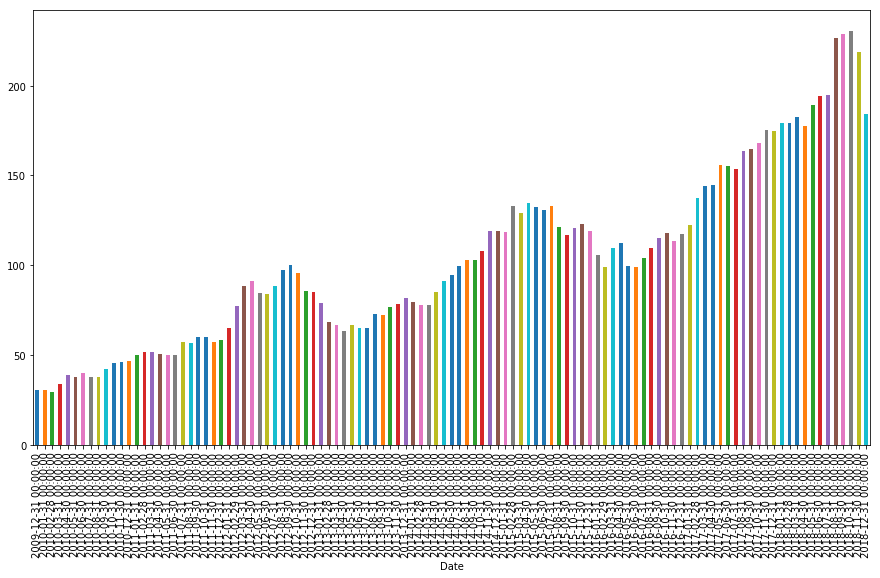

In [63]:
df['Open'].resample("M").max().plot(kind="bar", figsize=(15,8)) #오픈 가격의 월별 최대값 바 차타ㅡ

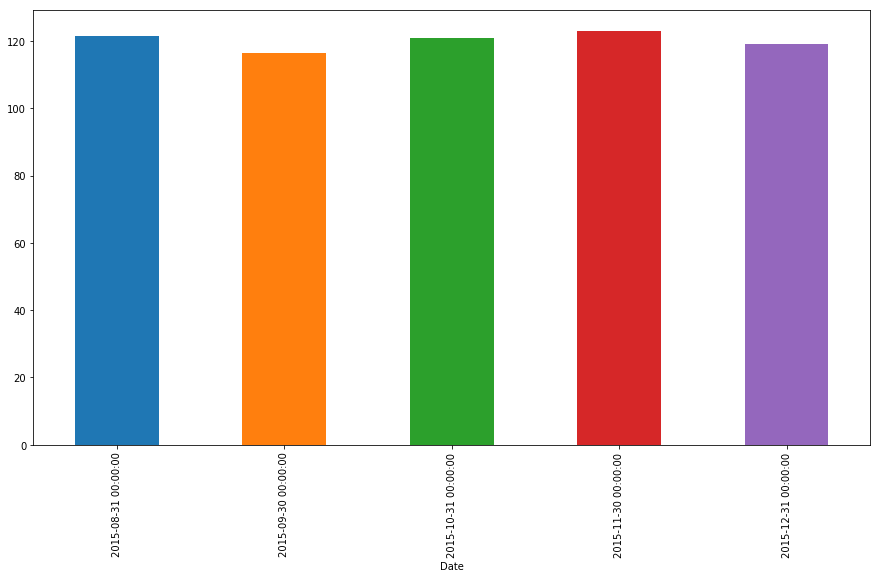

In [64]:
df['Open']['2015-8':'2015-12'].resample("M").max().plot(kind="bar", figsize=(15,8)) # 기간을 설정해서 바 차트를 만들 수도 있음

In [67]:
daily_daterange = \
pd.date_range(start=datetime(2018,9,1), 
              end=datetime(2019,1,24),
             freq='B') #B = 비즈니스 데이, 주말 빼고 인덱싱 만들어줌

In [70]:
daily_dataset = \
pd.DataFrame(
    data = {'value':np.random.rand(len(daily_daterange))},
            index=daily_daterange)

In [73]:
daily_dataset.head(10) # 8일, 9일 제외됨. 주말이라서!

,value
2018-09-03,0.879714
2018-09-04,0.685621
2018-09-05,0.709129
2018-09-06,0.022664
2018-09-07,0.922122
2018-09-10,0.136227
2018-09-11,0.957737
2018-09-12,0.858070
2018-09-13,0.792530
2018-09-14,0.550258


In [75]:
daily_dataset.resample('W-MON').min() #해당 값의 미니멈을 월요일 w-mon 은 위키데이 중 먼데이

,value
2018-09-03,0.879714
2018-09-10,0.022664
2018-09-17,0.430162
2018-09-24,0.004806
2018-10-01,0.017991
2018-10-08,0.157709
2018-10-15,0.054420
2018-10-22,0.176062
2018-10-29,0.185484
2018-11-05,0.125268


In [76]:
daily_dataset.resample('M').min() #그룹바이를 썼다면, 해당 월의 마지막날을 불러올 때 복잡해짐.ㅇ

,value
2018-09-30,0.004806
2018-10-31,0.054420
2018-11-30,0.034025
2018-12-31,0.017214
2019-01-31,0.004238


### shifting

In [77]:
df = pd.read_csv('apple_stock.csv', index_col='Date') #date 칼럼을 바로 인덱스로 부르기

In [79]:
df.index #datetime이 아니라object로 인덱스임

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

In [80]:
df['2009'] #안됨

KeyError: '2009'

In [81]:
df.index = pd.to_datetime(df.index)

In [82]:
df.index #타입 datetime으로 바뀜. 아까는 apply로 했는데 이번엔 이렇게

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [83]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [84]:
temp = np.asarray(df['Close'])

In [85]:
temp[:-1]

array([ 30.10428619,  30.5728569 ,  30.62571335, ..., 157.16999817,
       156.1499939 , 156.22999573])

In [87]:
temp[1:] #값이 하나씩 이동됨 

array([ 30.5728569 ,  30.62571335,  30.13857079, ..., 156.1499939 ,
       156.22999573, 157.74000549])

In [88]:
df.shift(1).head() #일일이 하나씩 하면 번거로우니까 하나씩 해줌

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [89]:
df.shift(1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996
2018-12-26,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-27,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-28,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-31,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


In [91]:
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-04,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-05,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-06,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-07,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305


In [93]:
df.shift(-1).tail() #뒤에서 하나씩 올라갔기 때문에 마지막에 미싱데이터

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# lagging lag lagged 한차원 래깅했다 라고 말함

In [94]:
df.tshift(freq="M", periods=1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


### rolling & expanding

In [95]:
pd.read_csv('apple_stock.csv', index_col='Date', parse_dates=True) #칼럼을 검사해서 자기가 파싱할 수 있는 형태의 칼럼이 발견되면 그걸 datetime으로 변환함

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065


In [96]:
df.index # 바로 datetime으로 바뀜

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [97]:
pd.read_csv('apple_stock.csv', index_col='Date', parse_dates=['Date']) #date라고 직접 언급해줘도 됨. 혹시 데이트타임으로 못바꾸는게 있다면 오류나니까 직접 지정가능

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065


In [98]:
#2019-JAN-01 이거 파싱 안됨. 이런 경우는 파싱 함수를 만들어줘야함

In [108]:
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, "%Y-%m-%d") #string parse time 스트링을 지정 포맷으로 읽어줌

In [109]:
dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [110]:
pd.read_csv('apple_stock.csv', index_col='Date',
           parse_dates=['Date'],
           date_parser=dateparser) #dateparser라는 함수

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065


In [112]:
df.rolling(7).mean() #7개 샘플을 윈도우를 7개짜리로 만들어 옮겨가며 샘플링, 각 샘플별로 7개씩 들어옴 
#앞 7개는 7개가 안차기 때문에 롤링 피어리어드 만큼 미싱이 발생할 수밖에 없음

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,1.209706e+08,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,1.296152e+08,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,1.336210e+08,20.177213


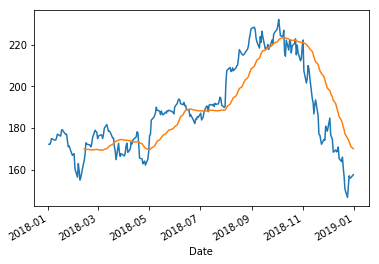

In [117]:
df['2018':]['Close'].plot()
df['2018':].rolling(window=30).mean()['Close'].plot() #주식의 오픈가격의 트랜드
#2019년 데이터와 오픈가격 트랜드 같이 보이기
#30일치 평균을 구해서 
#약간 뒤따라가는 형태. moving avg
#윈도우가 커질수록 실제를 반영하기 힘들어짐

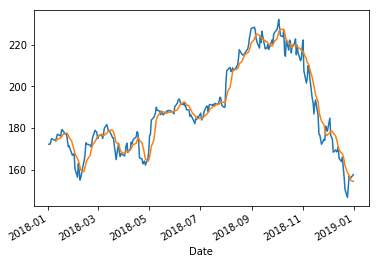

In [119]:
df['2018':]['Close'].plot()
df['2018':].rolling(window=7).mean()['Close'].plot() #훨씬 더 빨리 따라가는 트랜드

In [120]:
df["Close: 30 Day Mean"] = df['Close'].rolling(30).mean()

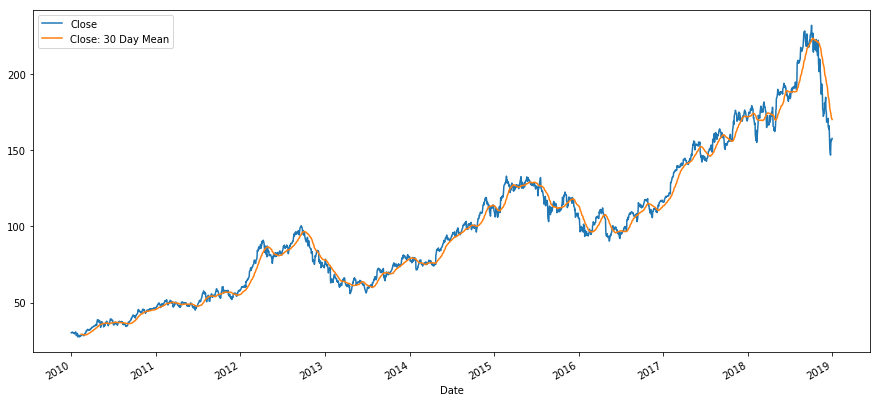

In [121]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,7)) #볼리~ 그릴 때 참고하기

### expanding

In [122]:
list(range(10)) #rolling은 window사이트를 2로 하면 01, 12, 23, 34, 로 aggregation함, expanding은 0, 01, 012, 0123 으로 됨

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

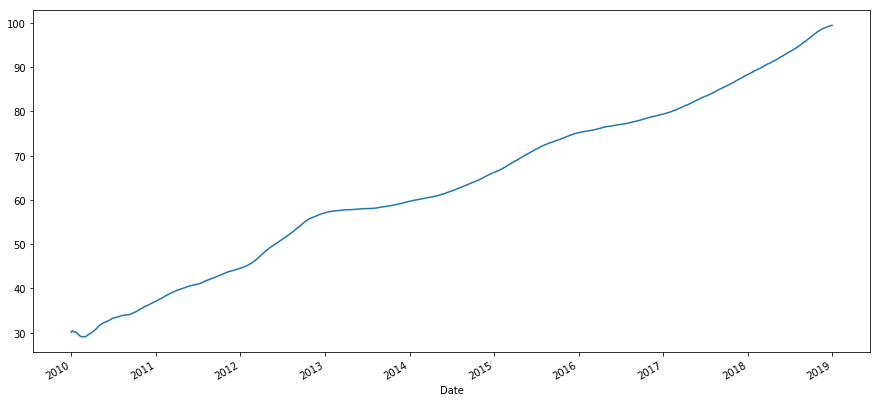

In [124]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7)) #누적 평균을 플로팅

In [125]:
#applestock으로 볼리저밴드 그리기

In [ ]:
# 20일 단위 종가 평균 트랜드값 

In [ ]:
df['Close'] #20일치 롤링값  std를 구해서  *2더해서 위로 더해주고 -2해서 아래로 더해주고 20일치moving avg

In [ ]:
#20일치 트렌드를 보고 ~값이 ~보다 위에있으면 사야한다.

In [145]:
df['Close: 20Day Mean']=df['Close'].rolling(window=20).mean()

In [146]:
df['Upper'] = df['Close: 20Day Mean'] + 2*df['Close'].rolling(20).std() # 2 std clos

In [147]:
df['Lower'] = df['Close: 20Day Mean'] - 2*df['Close'].rolling(20).std() #2std close

In [136]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,Close: 30 Day Mean,Close: 20Day Mean,Upper,Lower
Date,,,,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,NaN,NaN,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN,30.338572,60.677143,0.0
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN,30.599285,61.198570,NaN
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN,30.382142,60.764284,NaN
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,NaN,30.110714,60.221428,NaN


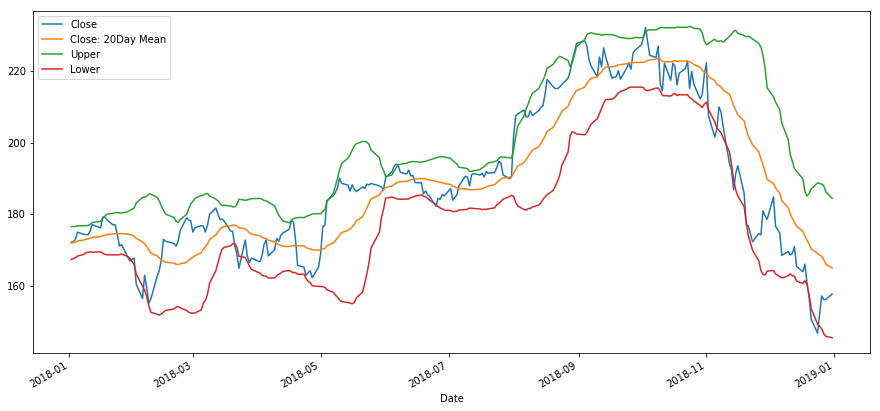

In [150]:
df['2018':][['Close','Close: 20Day Mean','Upper','Lower']].plot(figsize=(15,7)) #노란색이 트랜드 2 스탠다드 값이 어퍼